# EDA

Let's explore the cleaned data from the [ETL section](etl.ipynb).

In [109]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from helper_functions import *

# Initialize Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("eda").getOrCreate()
print(spark)

## Ratings

In [111]:
df = load_and_show('data/cleaned/ratings/', spark, parquet=True)

Columns data types:


,Column Name,Data Type
0,userId,int
1,movieId,int
2,rating,double


Number of partitions = 20
Number of entries/rows = 26024289

Data sample:


,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


Data description:


,summary,userId,movieId,rating
0,count,26024289,26024289,26024289
1,mean,135037.090248114,15849.109677040553,3.5280903543608817
2,stddev,78176.19722170143,31085.257531391675,1.0654427636662276
3,min,1,1,0.5
4,max,270896,176275,5.0


There are several things to notice:
+ The huge count of entries is reflected in the maximum number of users and movies.

+ Minimum rating is $0.5$, not $0$.

+ Mean rating is over the average rating.

## Movies Metadata

In [112]:
df = load_and_show('data/cleaned/movies_metadata', spark, parquet=True)

Columns data types:


,Column Name,Data Type
0,adult,boolean
1,budget,int
2,genres,array<string>
3,id,int
4,original_language,string
5,overview,string
6,popularity,double
7,production_companies,array<string>
8,production_countries,array<string>
9,release_date,date


Number of partitions = 9
Number of entries/rows = 45463

Data sample:


,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,tagline,title,video,vote_average,vote_count,collection,n_genres,n_production_companies,n_production_countries,n_spoken_languages
0,False,28000000,"[Drama, Music]",277216,en,"In 1987, five young men, using brutally honest...",21.183077,"[New Line Cinema, Universal Pictures, Legendar...",[United States of America],2015-08-13,...,The Story of N.W.A.,Straight Outta Compton,False,7.7,1381,None,2,6,1,1
1,False,0,[Drama],167284,en,This movie portrays three women living in toda...,0.153287,[],[],2004-01-01,...,None,Viva Algeria,False,7.2,3,None,1,0,0,0
2,False,0,"[Crime, Music, Romance]",298078,en,A merciless hit man rescues a prostitute from ...,0.782841,[],[Philippines],2014-10-24,...,"When violence is the only life you know, will ...",Ruined Heart: Another Love Story Between A Cri...,False,6.7,7,None,3,0,1,2
3,False,12000000,"[Adventure, Fantasy]",135858,en,A noble warrior must battle dragons and demons...,4.422468,"[Zinc Entertainment Inc., Bomar OOD]","[Bulgaria, United States of America]",2012-08-08,...,None,Dungeons & Dragons: The Book of Vile Darkness,False,4.2,17,Dungeons & Dragons Collection,2,2,2,1
4,False,0,"[Comedy, Thriller]",34210,en,At a school reunion dinner in a remote country...,0.105316,[Masses Entertainment],[United Kingdom],2007-02-01,...,12 strangers must co-exist for 96 hours to col...,Twelve in a Box,False,6.0,1,None,2,1,1,1


Data description:


,summary,budget,id,original_language,overview,popularity,revenue,runtime,status,tagline,title,vote_average,vote_count,collection,n_genres,n_production_companies,n_production_countries,n_spoken_languages
0,count,45463,45463,45452,44509,45463,45463,45206,45382,20413,45463,45463,45463,4491,45463,45463,45463,45463
1,mean,4224578.813474693,108359.91881310077,None,None,2.921377569452083,1.120860885984207E7,94.12757156129717,None,1942.0,Infinity,5.618217011635818,109.89085630072806,None,2.003695312671843,1.5425730814068583,1.087147790510965,1.1724479246860084
2,stddev,1.7424132634341218E7,112460.7492781322,None,None,6.0052338810123915,6.433018853029212E7,38.40680303693455,None,None,NaN,1.924174180673794,491.2948160154489,None,1.1310015734457073,1.7280161993057424,0.7644135138736045,0.7533890736892556
3,min,0,2,ab,,0.0,0,0.0,Canceled,,!Women Art Revolution,0.0,0,,0,0,0,0
4,max,380000000,469172,zu,"…ere erera baleibu izik subua aruaren…, a set ...",547.488298,2787965087,1256.0,Rumored,李麗珍蜜桃成熟時,ファンタスティポ,10.0,14075,식객 시리즈,8,26,25,19


+ The 'count' metric shows that there are several columns that have missing values, because `NULL` values aren't counted. This happens to `original_language`, `overview`, `runtime`, `status`, `tagline` and `collection`.

+ The minimum values of the numerical variables show that, strangely, some of them reach the value zero. This is specially disturbing for the columns `budget`, `revenue` and `runtime`.

+ Votes can be between 0 and 10, instead of being from 0 to 5, as the previous dataset. Furthermore, when rescaling it to match the users' ratings (simply dividing by 2), the mean rating does not match the mean vote average.

This dataset is small enough to work on Pandas:

In [113]:
pddf = df.toPandas()

### Zeros and Missing Values

In [114]:
with pd.option_context('display.max_columns', None): 
    display(pddf.loc[pddf['budget'] == 0, :].head(5))

,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection,n_genres,n_production_companies,n_production_countries,n_spoken_languages
1,False,0,[Drama],167284,en,This movie portrays three women living in toda...,0.153287,[],[],2004-01-01,0,113.0,[],Released,None,Viva Algeria,False,7.2,3,None,1,0,0,0
2,False,0,"[Crime, Music, Romance]",298078,en,A merciless hit man rescues a prostitute from ...,0.782841,[],[Philippines],2014-10-24,0,73.0,"[日本語, ]",Released,"When violence is the only life you know, will ...",Ruined Heart: Another Love Story Between A Cri...,False,6.7,7,None,3,0,1,2
4,False,0,"[Comedy, Thriller]",34210,en,At a school reunion dinner in a remote country...,0.105316,[Masses Entertainment],[United Kingdom],2007-02-01,0,93.0,[English],Released,12 strangers must co-exist for 96 hours to col...,Twelve in a Box,False,6.0,1,None,2,1,1,1
5,False,0,[Thriller],310133,en,Two kids find themselves in the centre of a de...,11.070889,"[Park Pictures, Audax Films, Dark Arts Film, E...",[United States of America],2015-08-07,134552,86.0,[English],Released,Their first drive could be their last.,Cop Car,False,5.8,301,None,1,4,1,1
6,False,0,"[Adventure, Drama, Family]",49070,en,Kamran is a 12 year old boy in the present day...,0.568838,[Guide Company Films Inc.],[United States of America],2005-06-10,0,95.0,"[English, فارسی]",Released,None,The Keeper: The Legend of Omar Khayyam,False,5.3,3,None,3,1,1,2


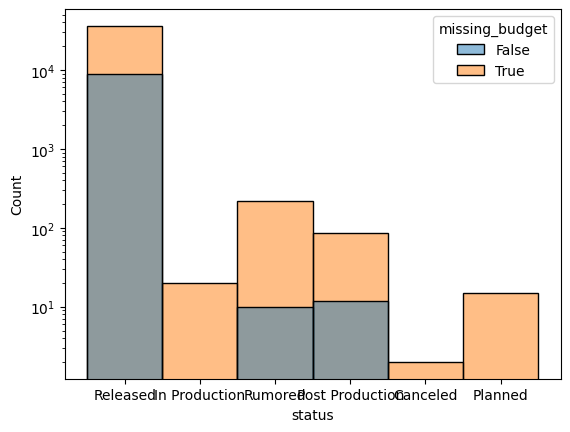

In [115]:
pddf['missing_budget'] = (pddf['budget'] == 0)
sns.histplot(data=pddf, x='status', hue='missing_budget')
plt.yscale('log')

The missing values in `budget` spread across all status values.

To begin with, let's check for missing values:

The column adult has no missing values
The column id has no missing values
The column title has no missing values
The column video has no missing values
The column collection data type is object and class is <class 'NoneType'> -- no specific actions assigned.
The column missing_budget has no missing values


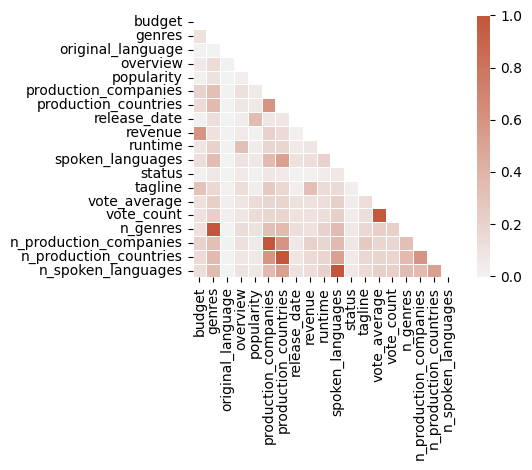

In [116]:
def missing_values_preprocess(df: pd.DataFrame):
    """
    Get a pandas DataFrame and return a DataFrame with integer columns. Each value inside of them 
    shows whether a value is considered missing (1) or not (0).

    This way, it is possible to check custom conditions, such as the `budget` column 
    having a value of zero.
    """
    # Get dtypes by column name
    dtype_df = pd.DataFrame(df.dtypes).reset_index()
    dtype_df.columns = ['name', 'dtype']

    # Iterate over the rows: (index, column_name, dtype)
    df_missing = pd.DataFrame() # if a cell is 1 -> missing value
    for _, row in dtype_df.iterrows():
        name = row.iloc[0]
        col_dtype = str(row.iloc[1])
        
        # Distinct treatment depending on data type
        if 'int' in col_dtype:
            new_col = (pddf[name] == 0).astype('int16')
        elif 'float' in col_dtype:
            new_col = (pddf[name] == 0.0).astype('int16')
        elif 'object' == col_dtype:
            # Pandas columns are object for either case
            if type(pddf[name][0]) == list:
                new_col = (pddf[name].str.len() == 0).astype('int16')
            elif type(pddf[name][0]) == str:
                new_col = (pddf[name].isna()).astype('int16')
            elif type(pddf[name][0]) == datetime.date: 
                new_col = (pddf[name].isna()).astype('int16')
            else:
                print(f'The column {name} data type is {col_dtype} and class is {type(pddf[name][0])} -- no specific actions assigned.')
                continue
        elif 'bool' in col_dtype:
            new_col = (pddf[name].isna()).astype('int16')
        
        # If there is a different type, show what it is
        else:
            print(f'The column {name} data type is {col_dtype} -- no specific actions assigned.')
            continue
        
        # If there are no missing values, there is no point showing this column in the corrplot
        if new_col.sum(axis=0) == 0:
            print(f'The column {name} has no missing values')
        else:
            df_missing[name] = new_col
    return df_missing

missing_df = missing_values_preprocess(pddf)
_ = show_correlation(missing_df)

**Relations between missing values**:

+ `collection` has None as its only value, so it can safely be removed.

+ `budget`, `revenue` and `tagline` seem to be weakly related. It is not enough to draw any conclusions.

+ `production_companies`, `production_countries`, `genres` and `spoken_languages` also show a correlation in their missing values, although it is weak as well.

+ `vote_count` and `vote_average` have a strong correlation on their missing values.

**Removing missing values**: the options to solve this problem by removing information are either to remove a movie from the record or removing a column. In this case, the most sensible approach would be to remove some columns, as removing movies could diminish the performance of the content-based recommender system. Let's see which of them are the most problematic by plotting the portion of movies with missing values from the total.

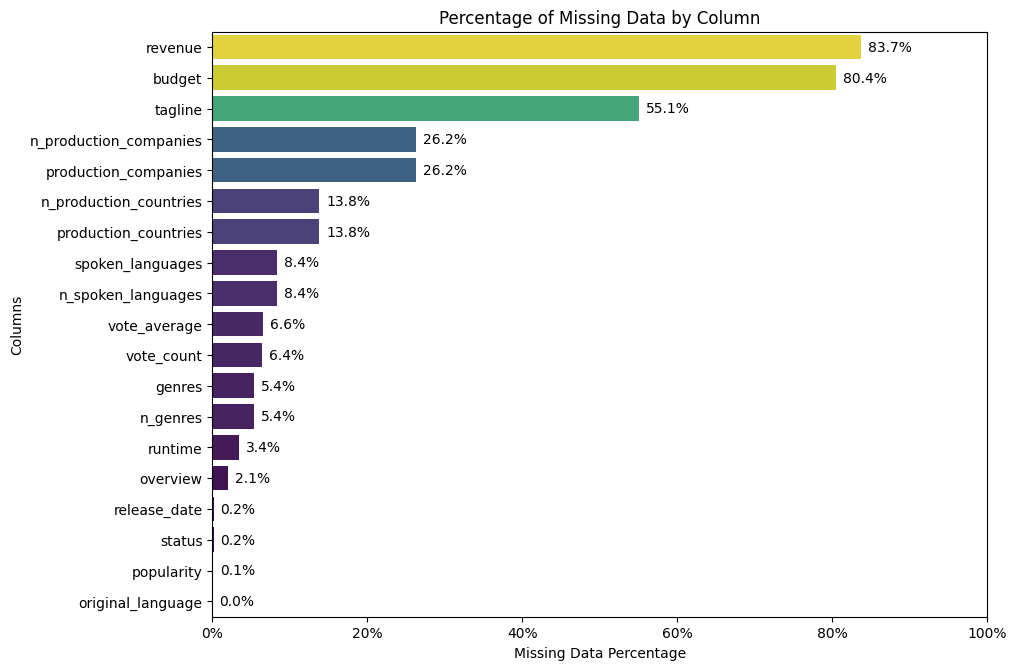

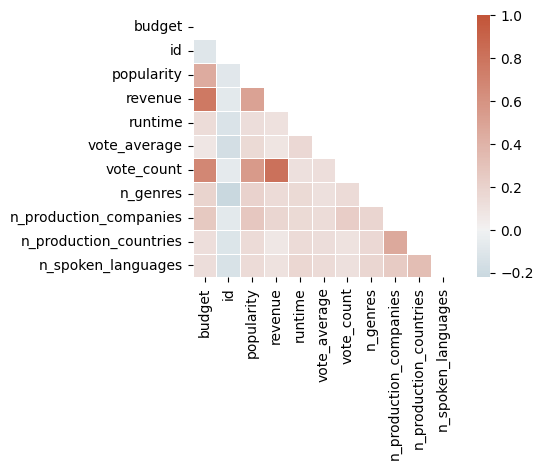

In [117]:
# Calculate missing values percentages
total_count = missing_df.shape[0] # total number of movies
percentage_count_missing = missing_df.sum(axis=0) / total_count * 100
percentage_count_missing = pd.DataFrame(percentage_count_missing).reset_index()
percentage_count_missing.columns = ['names', 'missing']

# Sort values from higher to lower
percentage_count_missing = percentage_count_missing.\
                            sort_values(by='missing', ascending=False)

# Plot
plt.figure(figsize=(10, 0.4 * len(percentage_count_missing))) # Adjust hight dynamically
ax = sns.barplot(data=percentage_count_missing, y='names', x='missing',
                 hue = percentage_count_missing['missing'],
                 palette='viridis')

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=10, padding=5)

# Set labels and title
plt.xlim(0, 100)
plt.xlabel('Missing Data Percentage')
plt.ylabel('Columns')
plt.title('Percentage of Missing Data by Column')
ax.legend().remove()
plt.show()

# Correlation between numeric variables
_ = show_correlation(pddf)

Even though the variables `budget` and `revenue` are very informative, they have many missing values, so we will rely on other like `popularity` and `vote_count`, which show correlation with them and have less missing information. 

Now, let's approach the rest of variables:

### Genres

In [118]:
# Dictionary of movies and genres
# + Explode('genres'): for each item in the list, create a new row.
# + After grouping by the now separated genres, the opposite operation is done 
#   (take movie names in separate rows and put them in a list).
genres_df = pddf.explode('genres').groupby('genres')['title'].apply(list).to_dict()


In [119]:
len(genres_df.keys())

20

In [120]:
temp = pddf.explode('genres').groupby('genres')['title'].apply(len).reset_index()
temp = pd.DataFrame(temp)
temp.columns = ['genre', 'n_movies']
temp.head(3)

,genre,n_movies
0,Action,6596
1,Adventure,3496
2,Animation,1935


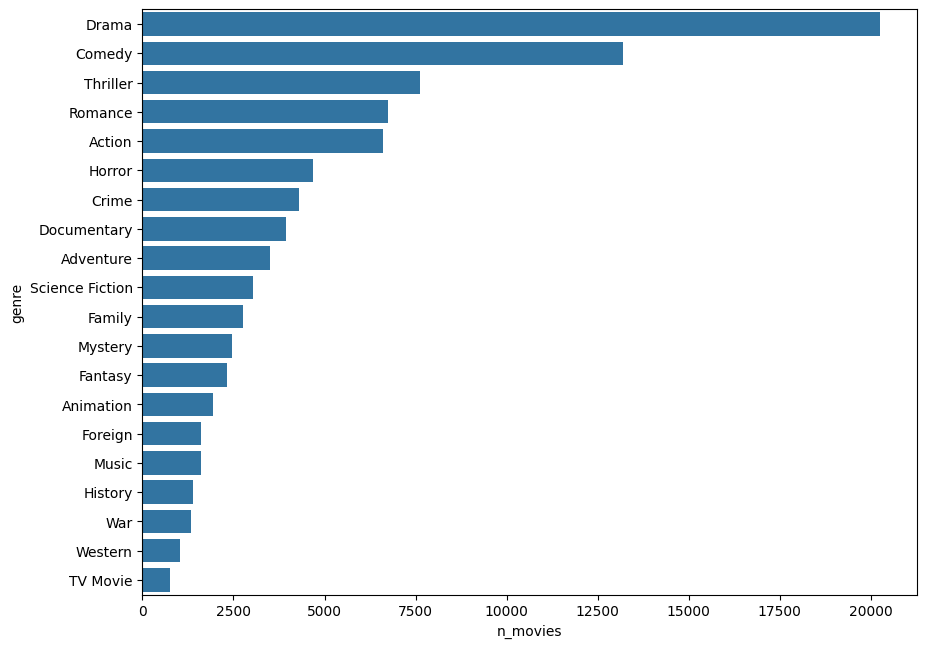

In [121]:
# Sort values from higher to lower
temp = temp.sort_values(by='n_movies', ascending=False)

# Plot
plt.figure(figsize=(10, 0.4 * len(percentage_count_missing))) # Adjust hight dynamically
ax = sns.barplot(temp, y='genre', x='n_movies')

# Set labels and title
# plt.xlabel('Missing Data Percentage')
# plt.ylabel('Columns')
# plt.title('Percentage of Missing Data by Column')
plt.show()

In [126]:
df = df.drop('budget', 'revenue', 'collection')
df.write.parquet('data/cleaned/movies2', mode='overwrite')

Stop Spark session:

In [108]:
spark.stop()

## References
+ [Advances PySpark for EDA](https://www.kaggle.com/code/tientd95/advanced-pyspark-for-exploratory-data-analysis#1.-Initialize-pyspark-framework-and-load-data-into-pyspark's-dataframe-)

+ [Pyspark.pandas](https://stackoverflow.com/questions/73788459/what-is-the-difference-between-pyspark-pandas-to-pandas)